In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
df_skroutz_word2vec = pd.read_parquet("../../Datos/embeddings/df_skroutz_word2vec.parquet",engine="pyarrow")

In [5]:
df_price_cross_tvs = pd.read_parquet("../../Datos/embeddings/df_price_cross_tvs_word2vec.parquet",engine="pyarrow")

In [31]:
df_price_cross_cameras = pd.read_parquet("../../Datos/embeddings/price_cross_cameras_word2vec.parquet",engine="pyarrow")

In [6]:
df_price_cross_tvs.groupby("same_product").count()

,ProductID,ProductID2,ProductID_word2vec,ProductID2_word2vec
same_product,,,,
False,22738,22738,22738,22738
True,22738,22738,22738,22738


In [3]:
df_skroutz_word2vec.groupby("same_product").count()

,ProductID,ProductID2,ProductID_word2vec,ProductID2_word2vec
same_product,,,,
False,31762,31762,31762,31762
True,31762,31762,31762,31762


In [33]:
df_price_cross_cameras.groupby("same_product").count()

,ProductID,ProductID2,ProductID_word2vec,ProductID2_word2vec
same_product,,,,
False,19169,19169,19169,19169
True,19169,19169,19169,19169


In [4]:
df_price_cross_cameras["features"] = df_price_cross_cameras["ProductID_word2vec"].apply(lambda row: row.tolist()) + df_price_cross_cameras["ProductID2_word2vec"].apply(lambda row: row.tolist())
df_price_cross_cameras["features"]=df_price_cross_cameras["features"].apply(lambda row: np.array(row))

NameError: name 'df_price_cross_cameras' is not defined

In [5]:
df_skroutz_word2vec["features"] = df_skroutz_word2vec["ProductID_word2vec"].apply(lambda row: row.tolist()) + df_skroutz_word2vec["ProductID2_word2vec"].apply(lambda row: row.tolist())

In [6]:
df_skroutz_word2vec["features"]=df_skroutz_word2vec["features"].apply(lambda row: np.array(row))

In [40]:
df_price_cross_tvs["features"] = df_price_cross_tvs["ProductID_word2vec"].apply(lambda row: row.tolist()) + df_price_cross_tvs["ProductID2_word2vec"].apply(lambda row: row.tolist())
df_price_cross_tvs["features"]=df_price_cross_tvs["features"].apply(lambda row: np.array(row))

NameError: name 'df_price_cross_tvs' is not defined

In [47]:
df_skroutz_word2vec["features"].iloc[0]

array([ 1.41276047e-01,  5.88989258e-02, -2.44140625e-03, -3.25520843e-04,
       -9.24886093e-02,  1.50573730e-01,  7.50325546e-02, -2.69775391e-02,
        4.95605469e-02,  1.11328125e-01, -1.53157547e-01, -1.05672203e-01,
       -6.60807267e-02, -5.69458008e-02, -3.41796875e-03,  3.47493477e-02,
        1.52506515e-01,  1.12792969e-01, -3.07617188e-02, -6.64062500e-02,
       -1.33534744e-01, -1.12141930e-01,  4.85839844e-02, -1.96482334e-02,
        4.07511406e-02, -3.29182930e-02, -1.30696610e-01,  1.32982895e-01,
        5.80240898e-02, -8.70971680e-02,  4.72005224e-03, -6.45345077e-02,
       -7.00683594e-02, -9.89583358e-02, -1.95312500e-01, -8.07291642e-02,
       -2.18912754e-02,  8.07291642e-02, -4.20735665e-02,  5.84513359e-02,
        1.94498692e-02, -2.01985672e-01,  8.74023438e-02,  7.01395655e-03,
        1.55598953e-01, -4.86653633e-02, -5.37923165e-02, -5.45756035e-02,
       -1.54622400e-03,  6.60807267e-02, -1.47054031e-01,  1.08072914e-01,
        7.79622421e-02, -

In [16]:
df_price_cross_tvs.shape

(45476, 6)

In [7]:
from torch.utils.data import Dataset, DataLoader

In [36]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len


In [37]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_price_cross_tvs["features"].explode().to_numpy().reshape(df_price_cross_tvs.shape[0],600).astype("float")
y = df_price_cross_tvs[["same_product"]].astype("int").to_numpy().reshape(df_price_cross_tvs.shape[0],1)

NameError: name 'df_price_cross_tvs' is not defined

In [38]:
X = df_skroutz_word2vec["features"].explode().to_numpy().reshape(df_skroutz_word2vec.shape[0],600).astype("float")
y = df_skroutz_word2vec[["same_product"]].astype("int").to_numpy().reshape(63524,1)

In [38]:
X = df_price_cross_cameras["features"].explode().to_numpy().reshape(df_price_cross_cameras.shape[0],600).astype("float")
y = df_price_cross_cameras[["same_product"]].astype("int").to_numpy().reshape(df_price_cross_cameras.shape[0],1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify= y)

In [40]:
batch_size = 1

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [68]:
batch_size = 64
test_data = Data(X, y)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [41]:
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([1, 600])
y shape: torch.Size([1, 1])


In [15]:
import torch
from torch import nn
from torch import optim

input_dim = 600
hidden_dim = 600
output_dim = 2

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
       

In [42]:
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [43]:
hidden_dim

600

In [44]:
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=600, out_features=600, bias=True)
  (layer_2): Linear(in_features=600, out_features=1, bias=True)
)


In [47]:
output_dim = 1
hidden_dim = 600
rnn_model = RNN(input_dim, hidden_dim, output_dim)
criterion = nn.NLLLoss()
rnn_model.zero_grad()
print(rnn_model)

RNN(
  (i2h): Linear(in_features=600, out_features=600, bias=True)
  (h2h): Linear(in_features=600, out_features=600, bias=True)
  (h2o): Linear(in_features=600, out_features=1, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [21]:
learning_rate = 0.00001

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
num_epochs = 50
loss_values = []
learning_rate = 0.000001
#optimizer = torch.optim.SGD(rnn_model.parameters(), lr=learning_rate)
hidden = torch.zeros(1, hidden_dim)
for epoch in range(num_epochs):
     # zero the parameter gradients
    #optimizer.zero_grad()
    hidden = rnn_model.initHidden()
    for X, y in train_dataloader:
        # forward + backward + optimize
        pred, hidden = rnn_model(X,hidden)
    print(pred[0])
    print(y.view(-1))
    loss = loss_fn(pred, y)
    loss.backward(retain_graph=True)
    loss_values.append(loss.item())
    for p in rnn_model.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    #optimizer.step()
    print(f"Ending epoch {epoch+1} with loss {loss.item()}")
print("Training Complete")

"""
Training Complete
"""

tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 1 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([1.])
Ending epoch 2 with loss 100.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([1.])
Ending epoch 3 with loss 100.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 4 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 5 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 6 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 7 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 8 with loss 0.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([1.])
Ending epoch 9 with loss 100.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([1.])
Ending epoch 10 with loss 100.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([1.])
Ending epoch 11 with loss 100.0
tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.])
Ending epoch 12 with loss 0.0
ten

'\nTraining Complete\n'

In [ ]:
num_epochs = 10
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y)
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

"""
Training Complete

In [23]:
import matplotlib.pyplot as plt

In [50]:
len(loss_values)

50

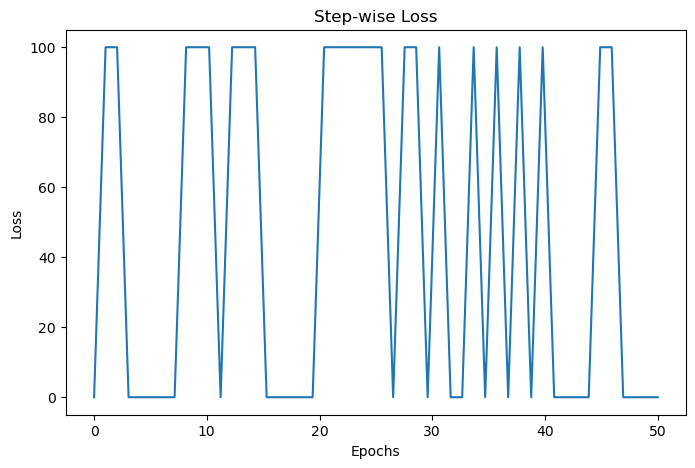

In [51]:
step = np.linspace(0, num_epochs, len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [52]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
total = 0
correct = 0
y_pred = []
y_test = []
with torch.no_grad():
    hidden = rnn_model.initHidden()
    for X, y in test_dataloader:
        
        outputs,hidden = rnn_model(X,hidden)
        print(outputs)
        predicted = np.where(outputs < 0.5, 0, 1)
        #predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y.numpy())
        print(y.numpy())
        #print((predicted == y.numpy()).sum())
        total += y.numpy().shape[0]
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the {total} test instances: {100 * correct // total}%')

tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[0.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0.]])
[[1.]]
tensor([[0

In [54]:
import itertools

In [62]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
total = 0
correct = 0
y_pred = []
y_test = []
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        #predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y.numpy())
        #print((predicted == y.numpy()).sum())
        total += y.numpy().shape[0]
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the {total} test instances: {100 * correct // total}%')

"""
Accuracy of the network on the 3300 test instances: 97%
"""

Accuracy of the network on the 20963 test instances: 87%


'\nAccuracy of the network on the 3300 test instances: 97%\n'

In [356]:
y_test

[array([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
   

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     10482
         1.0       0.00      0.00      0.00     10481

    accuracy                           0.50     20963
   macro avg       0.25      0.50      0.33     20963
weighted avg       0.25      0.50      0.33     20963



/Users/sebastianlopez/miniconda3/envs/maestriamatching/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebastianlopez/miniconda3/envs/maestriamatching/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebastianlopez/miniconda3/envs/maestriamatching/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [66]:
cf_matrix

array([[9064, 1418],
       [1244, 9237]])

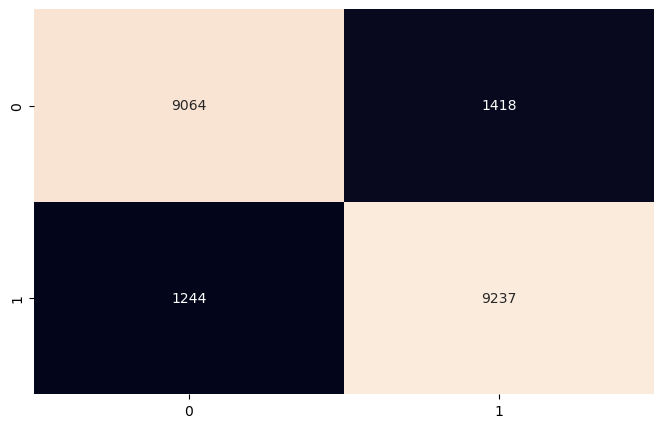

In [65]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()

In [386]:
torch.save(model.state_dict(), "../../Modelos/RedNeuronal2capas.pth")

In [387]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('../../Modelos/RedNeuronal2capas.pt') # Save

In [22]:
model = torch.jit.load('../../Modelos/RedNeuronal2capas.pt')
model.eval()

RecursiveScriptModule(
  original_name=NeuralNetwork
  (layer_1): RecursiveScriptModule(original_name=Linear)
  (layer_2): RecursiveScriptModule(original_name=Linear)
)

In [69]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
total = 0
correct = 0
y_pred = []
y_test = []
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        #predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y.numpy())
        #print((predicted == y.numpy()).sum())
        total += y.numpy().shape[0]
        correct += (predicted == y.numpy()).sum().item()
print(f'Accuracy of the network on the {total} test instances: {100 * correct // total}%')

Accuracy of the network on the 45476 test instances: 49%


In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.29      0.00      0.01     22738
         1.0       0.50      0.99      0.66     22738

    accuracy                           0.50     45476
   macro avg       0.40      0.50      0.34     45476
weighted avg       0.40      0.50      0.34     45476



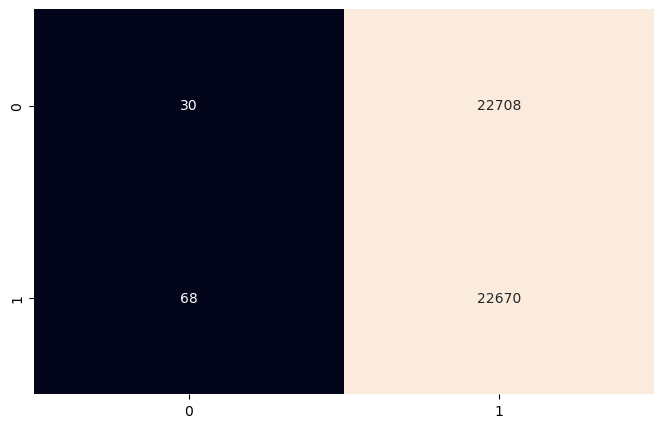

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()

In [40]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
total = 0
correct = 0
y_pred = []
y_test = []
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        #predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y.numpy())
        #print((predicted == y.numpy()).sum())
        total += y.numpy().shape[0]
        correct += (predicted == y.numpy()).sum().item()
print(f'Accuracy of the network on the {total} test instances: {100 * correct // total}%')

Accuracy of the network on the 38338 test instances: 48%


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     19169
         1.0       0.49      0.98      0.66     19169

    accuracy                           0.49     38338
   macro avg       0.25      0.49      0.33     38338
weighted avg       0.25      0.49      0.33     38338



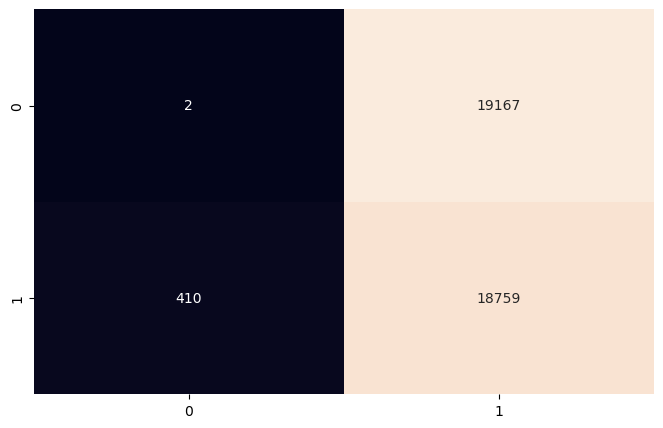

In [42]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()